In [1]:
import pandas as pd


In [2]:
# Load the dataset
data = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')


In [3]:
# Display the first few rows of the dataset
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


 #Normalizing the Text Data

In [4]:
import re

In [5]:
# Function to normalize text
def normalize_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

In [6]:
# Apply normalization
data['normalized_text'] = data['Message'].apply(normalize_text)


In [7]:
# Display the first few rows of the normalized text
data[['Message', 'normalized_text']].head()

,Message,normalized_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


#Tokenization and Stopword Removal

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [9]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# Function to tokenize text and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [11]:
# Apply tokenization and stopword removal
data['tokens'] = data['normalized_text'].apply(tokenize_and_remove_stopwords)

In [12]:
# Display the first few rows of tokens
data[['normalized_text', 'tokens']].head()

,normalized_text,tokens
0,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,free entry in a wkly comp to win fa cup final...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t..."


#Applying Stemming and Lemmatization

In [13]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [14]:
# Download required NLTK data
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
# Function to apply stemming and lemmatization
def stem_and_lemmatize(tokens):
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    return lemmatized_tokens

In [16]:
# Apply stemming and lemmatization
data['processed_tokens'] = data['tokens'].apply(stem_and_lemmatize)

In [17]:
# Display the first few rows of processed tokens
data[['tokens', 'processed_tokens']].head()

,tokens,processed_tokens
0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


 #Creating N-gram Models

In [18]:
from sklearn.feature_extraction.text import CountVectorizer


In [19]:
# Function to join tokens into a single string
def join_tokens(tokens):
    return ' '.join(tokens)

In [20]:
# Apply the join_tokens function
data['processed_text'] = data['processed_tokens'].apply(join_tokens)

In [29]:
# Create CountVectorizer with N-grams (unigrams, bigrams, trigrams)
vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data['processed_text'])


In [24]:

# Display the shape of the transformed data
data.shape

(5572, 6)

#Splitting Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

In [30]:
# Define the target variable (spam or ham)
y = data['Category'].map({'ham': 0, 'spam': 1})


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 67303), (1115, 67303), (4457,), (1115,))

#Training a Classifier(Logistic regression)

In [33]:
from sklearn.linear_model import LogisticRegression


In [34]:
# Initialize and train the Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#Evaluating the Model

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
# Predict the labels for the test set
y_pred = classifier.predict(X_test)

In [37]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [38]:
# Display the evaluation metrics
accuracy, precision, recall, f1

(0.979372197309417, 1.0, 0.8456375838926175, 0.9163636363636364)

#Reporting the Results

In [39]:
report = f"""
Model Evaluation Report (Logistic Regression):

Accuracy: {accuracy:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1 Score: {f1:.2f}
"""

print(report)


Model Evaluation Report (Logistic Regression):

Accuracy: 0.98
Precision: 1.00
Recall: 0.85
F1 Score: 0.92



Summary of Model Performance
High Accuracy: The model is highly accurate, correctly classifying 98% of the messages.
Perfect Precision: The model has a perfect precision score, meaning every message it flagged as spam was indeed spam. This eliminates the risk of false positives, which is critical in avoiding unnecessary actions on legitimate messages.
Good Recall: The recall of 0.85 indicates that the model is good at detecting spam, but it still misses 15% of actual spam messages. This can be an area for improvement if further spam detection is necessary.
Balanced Performance: The F1 Score of 0.92 suggests that the model maintains a good balance between precision and recall, making it reliable in identifying spam messages while minimizing false positives.

#visualizations of results

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve


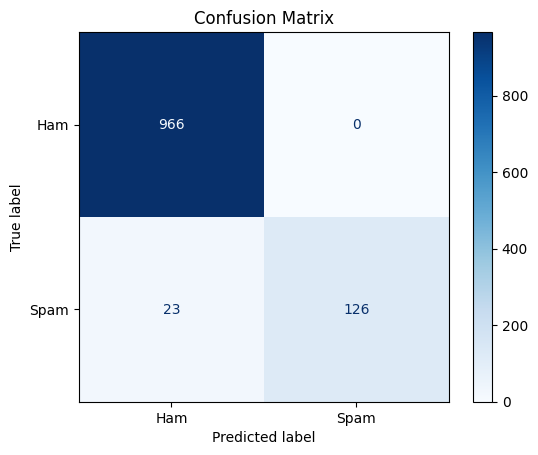

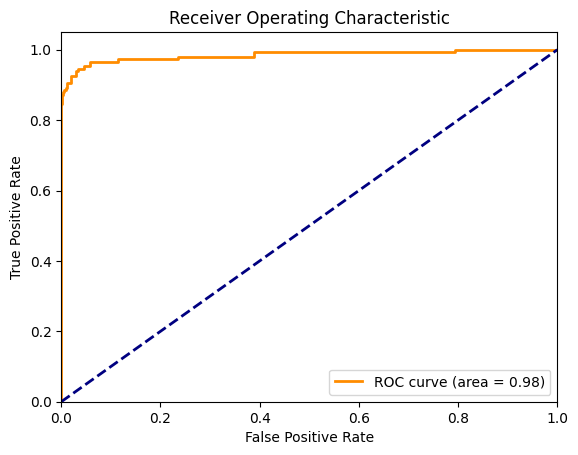

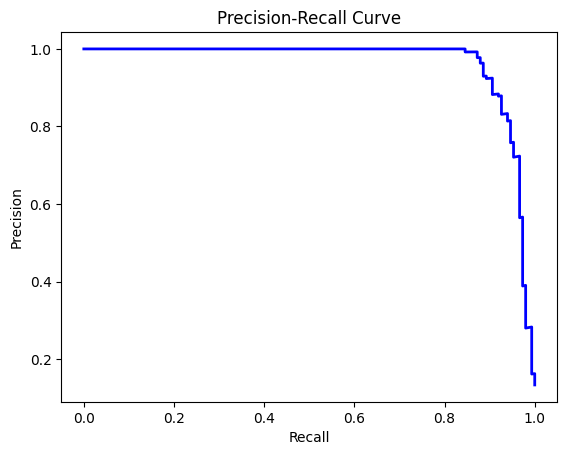

In [41]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot the ROC curve
def plot_roc_curve(y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot the Precision-Recall curve
def plot_precision_recall_curve(y_test, y_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Get prediction probabilities
y_proba = classifier.predict_proba(X_test)[:, 1]

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Plot ROC curve
plot_roc_curve(y_test, y_proba)

# Plot Precision-Recall curve
plot_precision_recall_curve(y_test, y_proba)

Graphical Results Interpretation

Confusion Matrix: Would show a high number of true positives and true negatives with no false positives and some false negatives.

ROC Curve: Would likely show a curve that is close to the top-left corner, indicating high true positive rate and low false positive rate, with an AUC close to 1.0.

Precision-Recall Curve: Would show high precision and recall values, reflecting the strong performance of the model in both precision and recall metrics.
